# Chapter 6 Figures
Nicole Pagane

In [1]:
# read in libraries necessary to produce graphics
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as snt
import random

6.1.3 Equilibrium

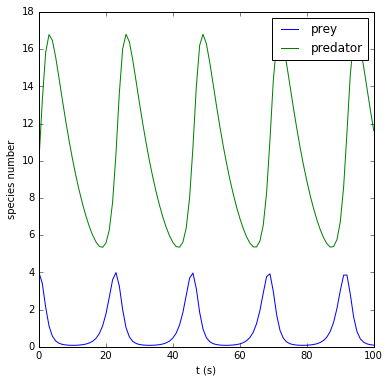

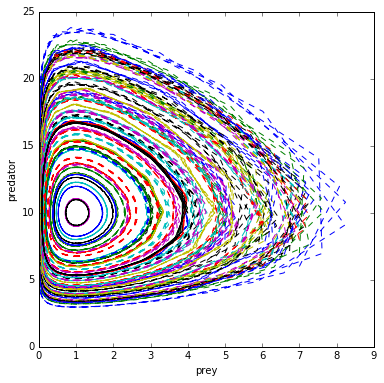

In [5]:
# define intital values and parameters
y0 = [4, 10]
k1 = 1
k2 = .1
k3 = .1
ti = 0
tf = 100

t = np.linspace(ti, tf, 101)
# define rates equations
def rates(y, t):
    return np.asarray([k1*y[0]-k2*y[0]*y[1],
               k2*y[0]*y[1] - k3*y[1]])
    
res = snt.odeint(rates, y0,t)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ax.plot(t, res[:,0],t, res[:,1]) # page 173

ax.set_xlabel('t (s)')
ax.set_ylabel('species number');

ax.legend(['prey', 'predator'])

# plot of predator v prey 

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
y0trial = [0,0]
for i in range(-4,4):
    for j in range(-4,4):
        y0trial[0] = y0[0] + i
        y0trial[1] = y0[1] + j
        test = snt.odeint(rates, y0trial,t)
        plt.plot(test[:,0],test[:,1], '--')


ax.plot(res[:,0], res[:,1], 'k') # page 174

ax.set_xlabel("prey")
ax.set_ylabel("predator")
plt.show()


6.1.4 Reversibility 

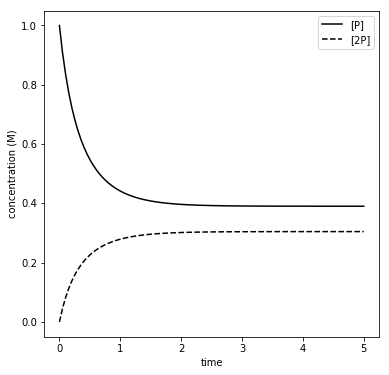

In [4]:
# define intital values and parameters
x0 = [1, 0]
k1 = 1
k2 = .5
ti = 0
tf = 5

t = np.linspace(ti, tf, 100)
# define rates equations
def rates(x, t):
    return np.asarray([2*k2*x[1]-2*k1*x[0]*x[0],
               k1*x[0]*x[0] - k2*x[1]])
    
y = snt.odeint(rates, x0,t)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ax.plot(t, y[:,0], 'k', t, y[:,1], 'k--') # page 175

ax.set_xlabel('time')
ax.set_ylabel('concentration (M)')
ax.legend(['[P]', '[2P]'])
plt.show()


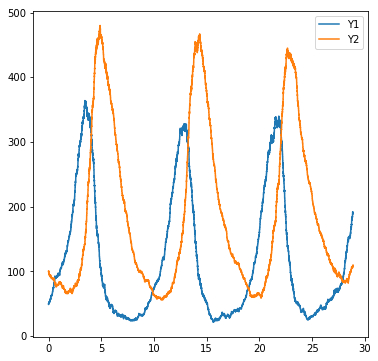

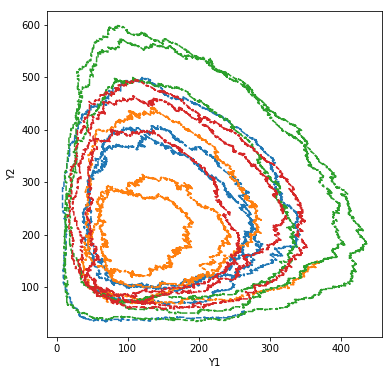

In [23]:
N = {}
N['Pre'] = np.asarray([1,0,1,1,0,1]).reshape([3,2])
N['Post'] = np.asarray([2,0,0,2,0,0]).reshape([3,2])
N['M'] = [50,100]
N['c'] = [1, 0.005,  0.6]

def rates(x, t):
    return np.asarray([N['c'][0]*x[0],
                       N['c'][1]*x[0]*x[1],
                      N['c'][2]*x[1]]).reshape([3,1])

def gillespie(N,n):
    tt = 0
    x = N['M']
    S = np.transpose(N['Post']-N['Pre'])
    u = S.shape[0]
    v = S.shape[1]
    tvec = np.zeros(n)
    xmat = np.matrix(np.zeros([n+1,u]))
    xmat[0,:] = x
    for i in range(0,n):
        h = rates(x,tt)
        h0 = np.sum(h)
        tt = tt + np.random.exponential(1/h0,1)
        #j = np.random.choice(v, 1, (h/np.sum(h)).tolist())
        #x = x + np.transpose(S[:,j])
        #tvec[i] = tt
        #xmat[i+1,:] = x
        #x = x[0].tolist()
        cdf = np.cumsum(h)/h0;
        rand = np.random.random()
        for j in range(len(cdf)):
            if rand < cdf[j]:
                mu = j;
                break
        x = x + np.transpose(S[:,mu])
        tvec[i] = tt
        xmat[i+1,:] = x
    return np.asarray([tvec, xmat])

n = 10000
out = gillespie(N, n)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.step(out[0], out[1][:,0][0:n])
ax.step(out[0], out[1][:,1][0:n])
ax.legend(['Y1', 'Y2'])

# plot of predator v prey 

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
y0trial = [0,0]
for i in range(-1,1):
    for j in range(-1,1):
        y0trial[0] = N['M'][0] + i
        y0trial[1] = N['M'][1] + j
        out = gillespie(N, n)
        ax.plot(out[1][:,0],out[1][:,1], '--')

ax.set_xlabel("Y1")
ax.set_ylabel("Y2")

plt.show()